# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
import os
import re

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




In [2]:
folder_path = "VANAD_data"

files_appels = []
files_activites = []

for filename in os.listdir(folder_path):
    if re.match(r"calls-.*\.csv", filename, re.IGNORECASE):
        files_appels.append(os.path.join(folder_path, filename))
    elif re.match(r"activity-.*\.csv", filename, re.IGNORECASE):
        files_activites.append(os.path.join(folder_path, filename))

print("Fichiers appels :", files_appels)
print("Fichiers activitess :", files_activites)

Fichiers appels : ['VANAD_data/calls-2014-07.csv', 'VANAD_data/calls-2014-06.csv', 'VANAD_data/calls-2014-12.csv', 'VANAD_data/calls-2014-04.csv', 'VANAD_data/calls-2014-10.csv', 'VANAD_data/calls-2014-11.csv', 'VANAD_data/calls-2014-05.csv', 'VANAD_data/calls-2014-01.csv', 'VANAD_data/calls-2014-02.csv', 'VANAD_data/calls-2014-03.csv', 'VANAD_data/calls-2014-08.csv', 'VANAD_data/calls-2014-09.csv']
Fichiers activitess : ['VANAD_data/activity-2014-08.csv', 'VANAD_data/activity-2014-09.csv', 'VANAD_data/activity-2014-01.csv', 'VANAD_data/activity-2014-02.csv', 'VANAD_data/activity-2014-03.csv', 'VANAD_data/activity-2014-07.csv', 'VANAD_data/activity-2014-12.csv', 'VANAD_data/activity-2014-06.csv', 'VANAD_data/activity-2014-10.csv', 'VANAD_data/activity-2014-04.csv', 'VANAD_data/activity-2014-05.csv', 'VANAD_data/activity-2014-11.csv']


In [3]:
activites_column = [colum for colum in pd.read_csv("VANAD_data/activity-2014-01.csv").columns]
calls_colum = [colum for colum in pd.read_csv("VANAD_data/calls-2014-01.csv").columns]

In [4]:
print("calls columns :", calls_colum)
print("activites columns :", activites_column)

calls columns : ['date_received', 'queue_name', 'agent_number', 'answered', 'consult', 'transfer', 'hangup']
activites columns : ['id', 'user_id', 'dnd_id', 'campaign_id', 'extension', 'last_call_id', 'startdatetime', 'enddatetime', 'agent_id']


In [5]:
def load_and_process_calls(files):
    df_list = []
    for f in files:
        df = pd.read_csv(f, parse_dates=["date_received"])
        # Si date_received contient des erreurs, décommenter la ligne ci-dessous pour forcer la conversion
        df['date_received'] = pd.to_datetime(df['date_received'], errors='coerce')

        # Colonnes temporelles sur date_received
        df['year'] = df['date_received'].dt.year
        df['month'] = df['date_received'].dt.month
        df['day'] = df['date_received'].dt.day
        df['day_of_week'] = df['date_received'].dt.dayofweek
        df['hour'] = df['date_received'].dt.hour
        df['minute'] = df['date_received'].dt.minute
        df['time_of_day'] = df['hour'] + df['minute'] / 60
        df_list.append(df)
    return pd.concat(df_list, ignore_index=True)


In [6]:
def load_and_process_activities(files):
    df_list = []
    for f in files:
        df = pd.read_csv(f, parse_dates=["startdatetime", "enddatetime"])
        df['startdatetime'] = pd.to_datetime(df['startdatetime'], errors='coerce')
        df['enddatetime'] = pd.to_datetime(df['enddatetime'], errors='coerce')

        # Colonnes temporelles sur startdatetime
        df['year'] = df['startdatetime'].dt.year
        df['month'] = df['startdatetime'].dt.month
        df['day'] = df['startdatetime'].dt.day
        df['day_of_week'] = df['startdatetime'].dt.dayofweek
        df['hour'] = df['startdatetime'].dt.hour
        df['minute'] = df['startdatetime'].dt.minute
        df['secondes'] = df['startdatetime'].dt.second
        df['time_of_day'] = df['hour'] + df['minute']/60
        # Durée de l'activité (en secondes)
        df['duration'] = (df['enddatetime'] - df['startdatetime']).dt.total_seconds()
        df_list.append(df)
    return pd.concat(df_list, ignore_index=True)

In [7]:
df_appels = load_and_process_calls(files_appels)
df_activites = load_and_process_activities(files_activites)

df_appels = df_appels.sort_values(by='date_received').reset_index(drop=True)
df_activites = df_activites.sort_values(by='startdatetime').reset_index(drop=True)

In [8]:
df_appels = df_appels.sort_values(by='date_received').reset_index(drop=True)
df_activites = df_activites.sort_values(by='startdatetime').reset_index(drop=True)

df_appels.to_csv("all_calls_2014_clean.csv", index=False)
df_activites.to_csv("all_activities_2014_clean.csv", index=False)

In [9]:
df_calls = pd.read_csv("all_calls_2014_clean.csv")

In [10]:
df_calls.head()

,date_received,queue_name,agent_number,answered,consult,transfer,hangup,year,month,day,day_of_week,hour,minute,time_of_day
0,2014-01-02 08:03:21,30175,6935.0,2014-01-02 08:03:22,NaN,NaN,2014-01-02 08:05:54,2014,1,2,3,8,3,8.050000
1,2014-01-02 08:04:37,30560,6940.0,2014-01-02 08:04:38,NaN,NaN,2014-01-02 08:09:49,2014,1,2,3,8,4,8.066667
2,2014-01-02 08:06:26,30172,6968.0,2014-01-02 08:06:27,NaN,NaN,2014-01-02 08:15:17,2014,1,2,3,8,6,8.100000
3,2014-01-02 08:08:07,30175,9424.0,2014-01-02 08:08:08,NaN,NaN,2014-01-02 08:10:37,2014,1,2,3,8,8,8.133333
4,2014-01-02 08:08:26,30172,8076.0,2014-01-02 08:08:27,NaN,NaN,2014-01-02 08:14:59,2014,1,2,3,8,8,8.133333


In [11]:
df_activity = pd.read_csv("all_activities_2014_clean.csv")

In [12]:
df_activity.head()

,id,user_id,dnd_id,campaign_id,extension,last_call_id,startdatetime,enddatetime,agent_id,year,month,day,day_of_week,hour,minute,secondes,time_of_day,duration
0,20015827,6377,35,622,1144,0,2014-01-02 07:18:43,2014-01-02 08:00:11,8189,2014,1,2,3,7,18,43,7.300000,2488.0
1,20015849,6271,35,622,1117,0,2014-01-02 07:41:26,2014-01-02 08:00:03,8076,2014,1,2,3,7,41,26,7.683333,1117.0
2,20015856,5127,35,622,1123,0,2014-01-02 07:46:21,2014-01-02 07:59:49,6968,2014,1,2,3,7,46,21,7.766667,808.0
3,20015861,7565,35,622,7152,0,2014-01-02 07:48:52,2014-01-02 08:00:02,9423,2014,1,2,3,7,48,52,7.800000,670.0
4,20015866,7018,35,622,1149,0,2014-01-02 07:50:42,2014-01-02 08:00:14,8861,2014,1,2,3,7,50,42,7.833333,572.0


In [13]:

calls_per_hour = df_calls.groupby(['year', 'month', 'day', 'hour']).size()


/var/folders/zx/635_qd5j2gs5bb8jk4xvcfn80000gn/T/ipykernel_8580/3739143406.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=calls_per_dayofweek.index, y=calls_per_dayofweek.values, palette="coolwarm")


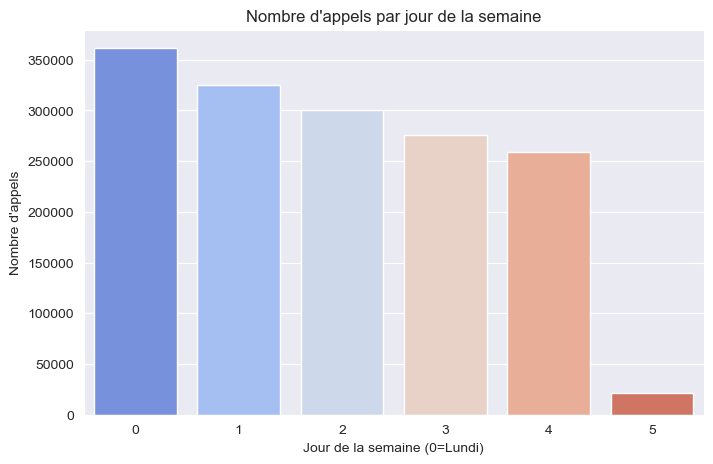

In [14]:
calls_per_dayofweek = df_calls.groupby('day_of_week').size()

plt.figure(figsize=(8, 5))
sns.barplot(x=calls_per_dayofweek.index, y=calls_per_dayofweek.values, palette="coolwarm")
plt.xlabel("Jour de la semaine (0=Lundi)")
plt.ylabel("Nombre d'appels")
plt.title("Nombre d'appels par jour de la semaine")
plt.show()


In [15]:
calls_by_type = df_calls.groupby("queue_name")["date_received"].count().reset_index()
calls_by_type.rename(columns={"date_received": "nb_calls"}, inplace=True)


/var/folders/zx/635_qd5j2gs5bb8jk4xvcfn80000gn/T/ipykernel_8580/4262340069.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="queue_name", y="nb_calls", data=calls_by_type, palette="Set2")


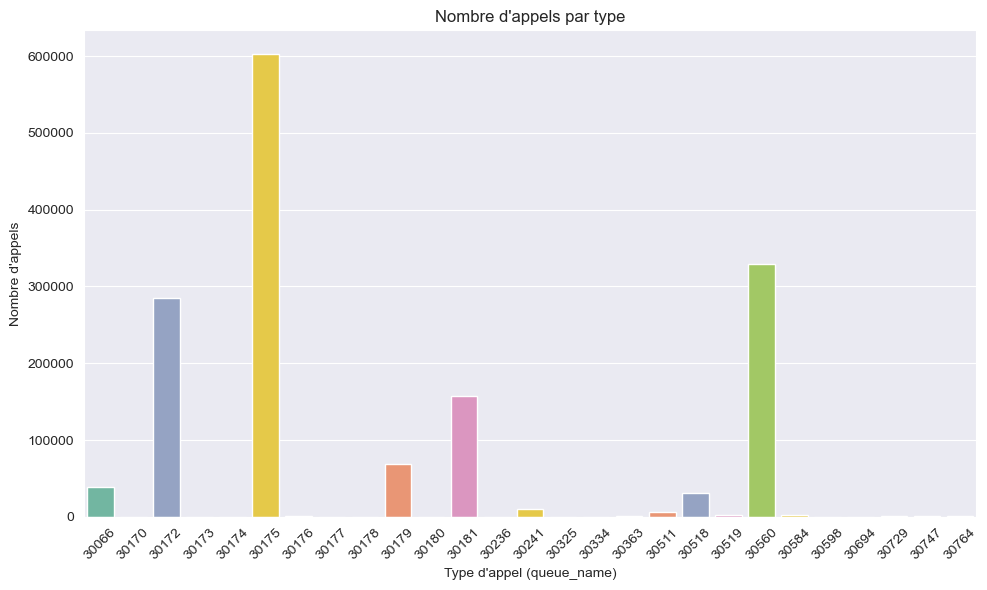

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x="queue_name", y="nb_calls", data=calls_by_type, palette="Set2")
plt.xticks(rotation=45)
plt.xlabel("Type d'appel (queue_name)")
plt.ylabel("Nombre d'appels")
plt.title("Nombre d'appels par type")
plt.tight_layout()
plt.show()

In [17]:
calls_by_type = df_calls.groupby("agent_number")["date_received"].count().reset_index()
calls_by_type.rename(columns={"date_received": "nb_calls"}, inplace=True)

/var/folders/zx/635_qd5j2gs5bb8jk4xvcfn80000gn/T/ipykernel_8580/1659459986.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="agent_number", y="nb_calls", data=top_agents, palette="Blues_d")


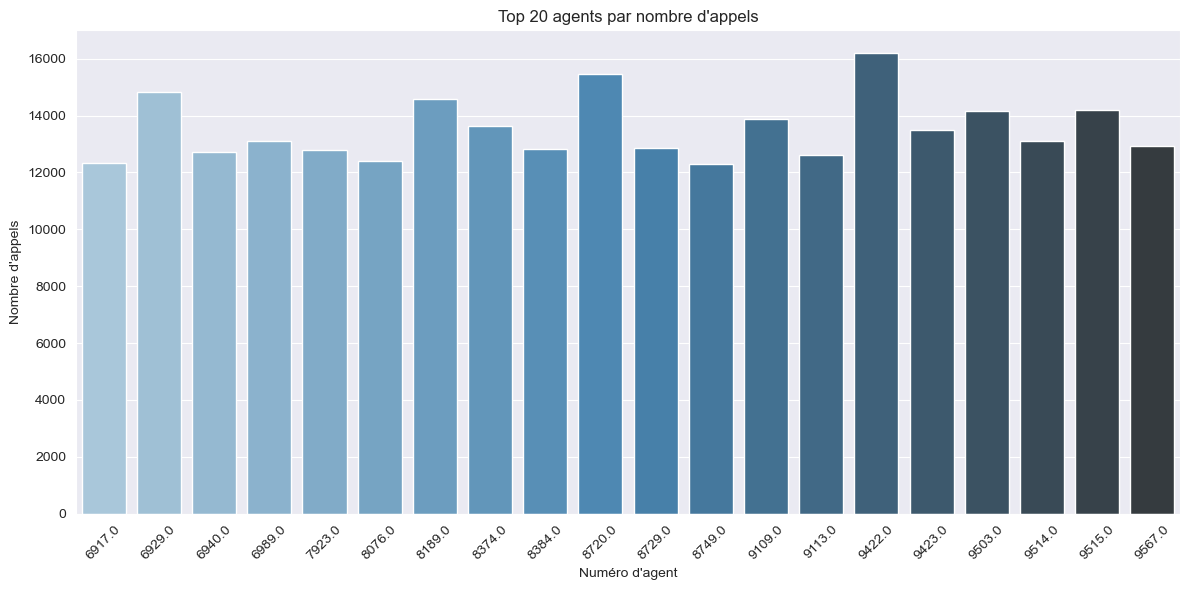

In [18]:

top_n = 20
top_agents = calls_by_type.sort_values("nb_calls", ascending=False).head(top_n)

plt.figure(figsize=(12, 6))
sns.barplot(x="agent_number", y="nb_calls", data=top_agents, palette="Blues_d")
plt.xticks(rotation=45)
plt.title(f"Top {top_n} agents par nombre d'appels")
plt.xlabel("Numéro d'agent")
plt.ylabel("Nombre d'appels")
plt.tight_layout()
plt.show()



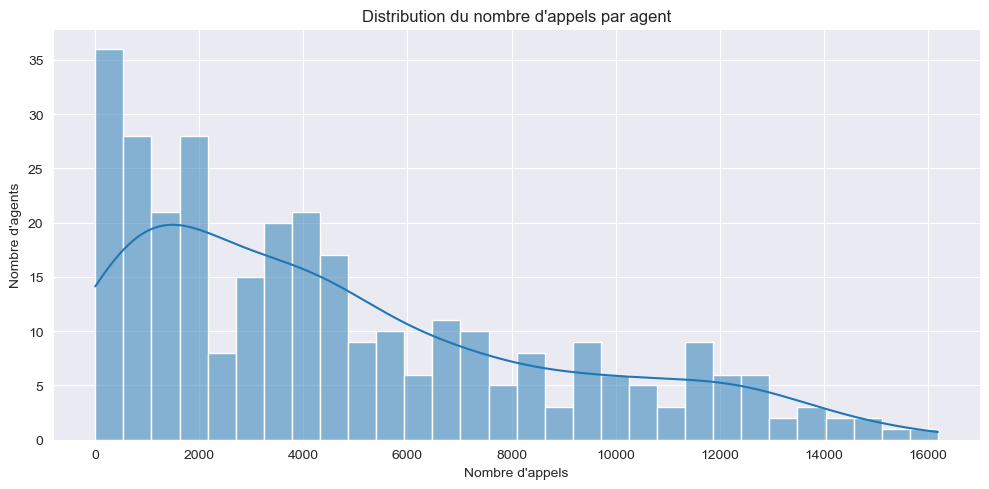

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(calls_by_type["nb_calls"], bins=30, kde=True)
plt.title("Distribution du nombre d'appels par agent")
plt.xlabel("Nombre d'appels")
plt.ylabel("Nombre d'agents")
plt.tight_layout()
plt.show()


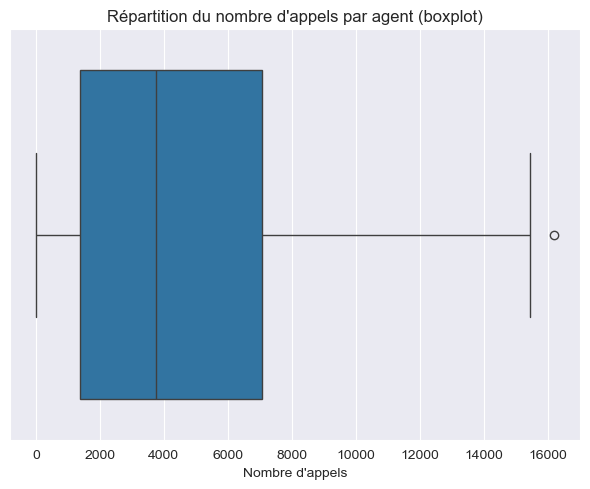

In [20]:
plt.figure(figsize=(6, 5))
sns.boxplot(x=calls_by_type["nb_calls"])
plt.title("Répartition du nombre d'appels par agent (boxplot)")
plt.xlabel("Nombre d'appels")
plt.tight_layout()
plt.show()


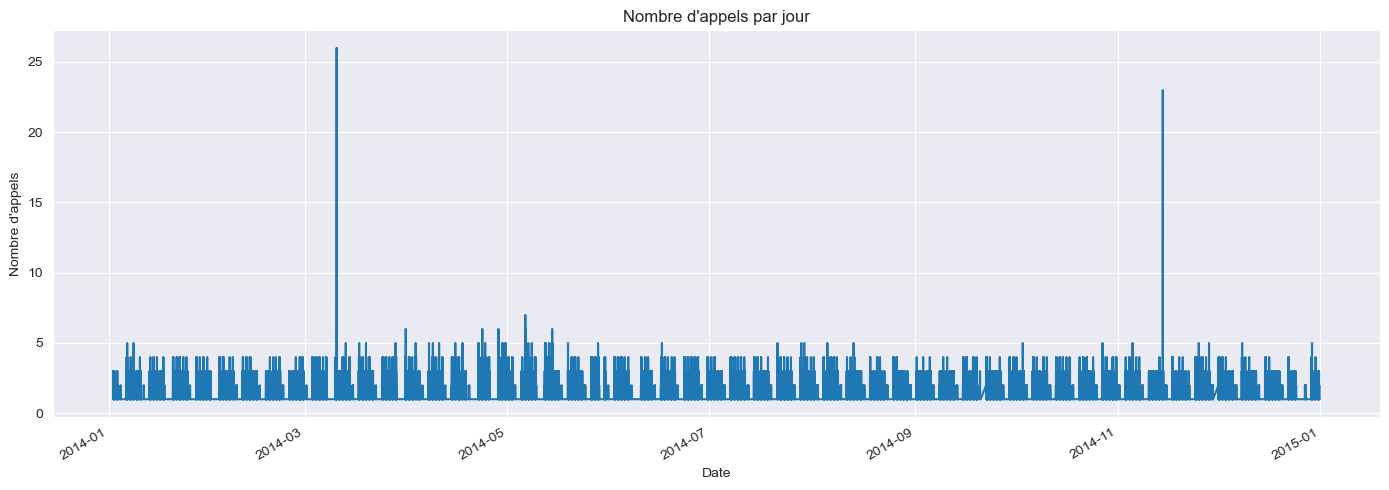

In [21]:
df_calls['date_received'] = pd.to_datetime(df_calls['date_received'], errors='coerce')
df_calls['date'] = df_calls['date_received'].dt.date
calls_per_day = df_calls.groupby("date_received").size()

plt.figure(figsize=(14, 5))
calls_per_day.plot()
plt.title("Nombre d'appels par jour")
plt.xlabel("Date")
plt.ylabel("Nombre d'appels")
plt.grid(True)
plt.tight_layout()
plt.show()


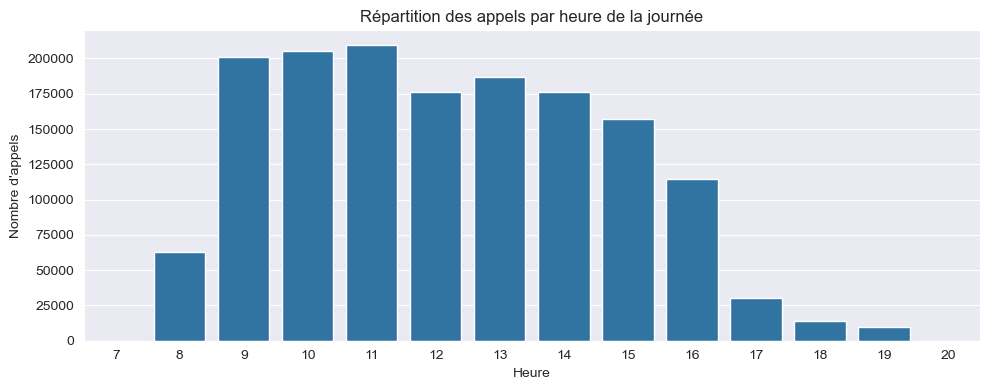

In [22]:
calls_by_hour = df_calls['hour'].value_counts().sort_index()

plt.figure(figsize=(10, 4))
sns.barplot(x=calls_by_hour.index, y=calls_by_hour.values)
plt.title("Répartition des appels par heure de la journée")
plt.xlabel("Heure")
plt.ylabel("Nombre d'appels")
plt.tight_layout()
plt.show()


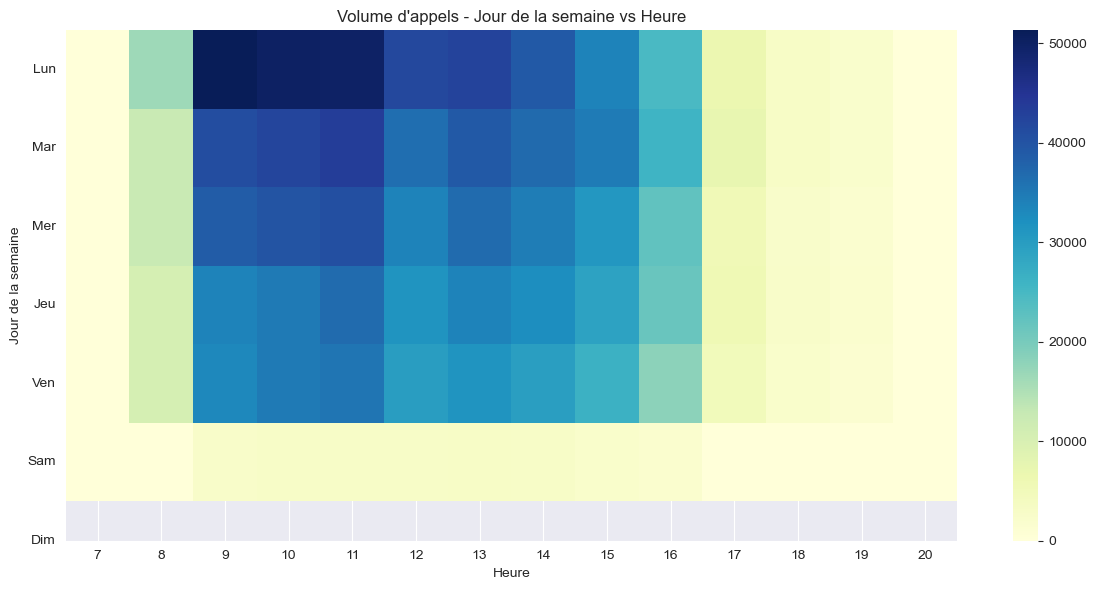

In [23]:
heatmap_data = df_calls.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False)
plt.title("Volume d'appels - Jour de la semaine vs Heure")
plt.xlabel("Heure")
plt.ylabel("Jour de la semaine")
plt.yticks(ticks=np.arange(7)+0.5, labels=["Lun", "Mar", "Mer", "Jeu", "Ven", "Sam", "Dim"], rotation=0)
plt.tight_layout()
plt.show()


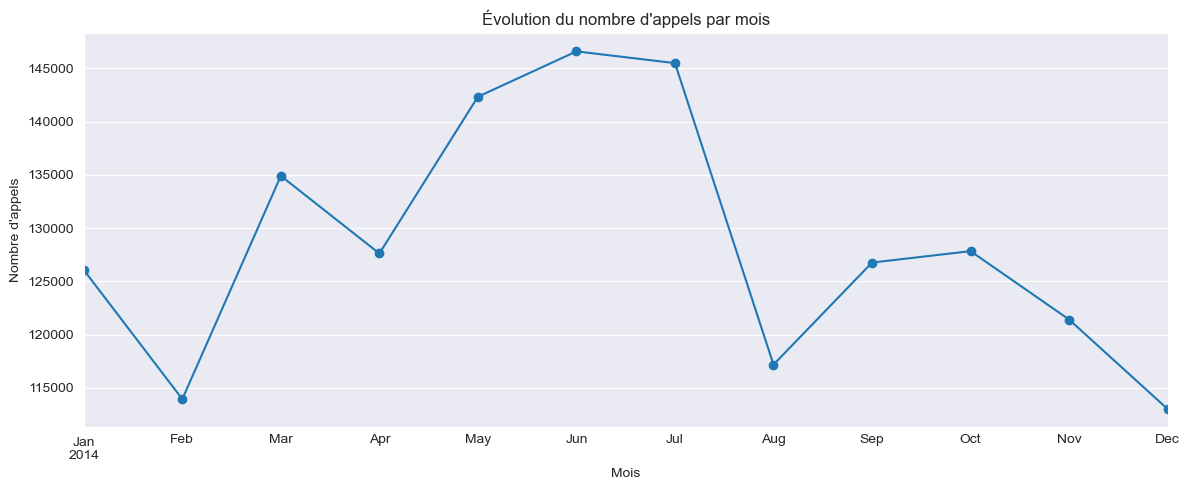

In [24]:
df_calls['month'] = df_calls['date_received'].dt.to_period("M")
calls_by_month = df_calls.groupby("month").size()

calls_by_month.plot(marker="o", figsize=(12, 5))
plt.title("Évolution du nombre d'appels par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre d'appels")
plt.grid(True)
plt.tight_layout()
plt.show()


      date_only  nb_calls
122  2014-05-26     10421
127  2014-06-02     10374
105  2014-05-06      9564
138  2014-06-16      9384
123  2014-05-27      9359
51   2014-03-03      9338
277  2014-11-25      9106
133  2014-06-10      8946
150  2014-06-30      8696
93   2014-04-22      8554


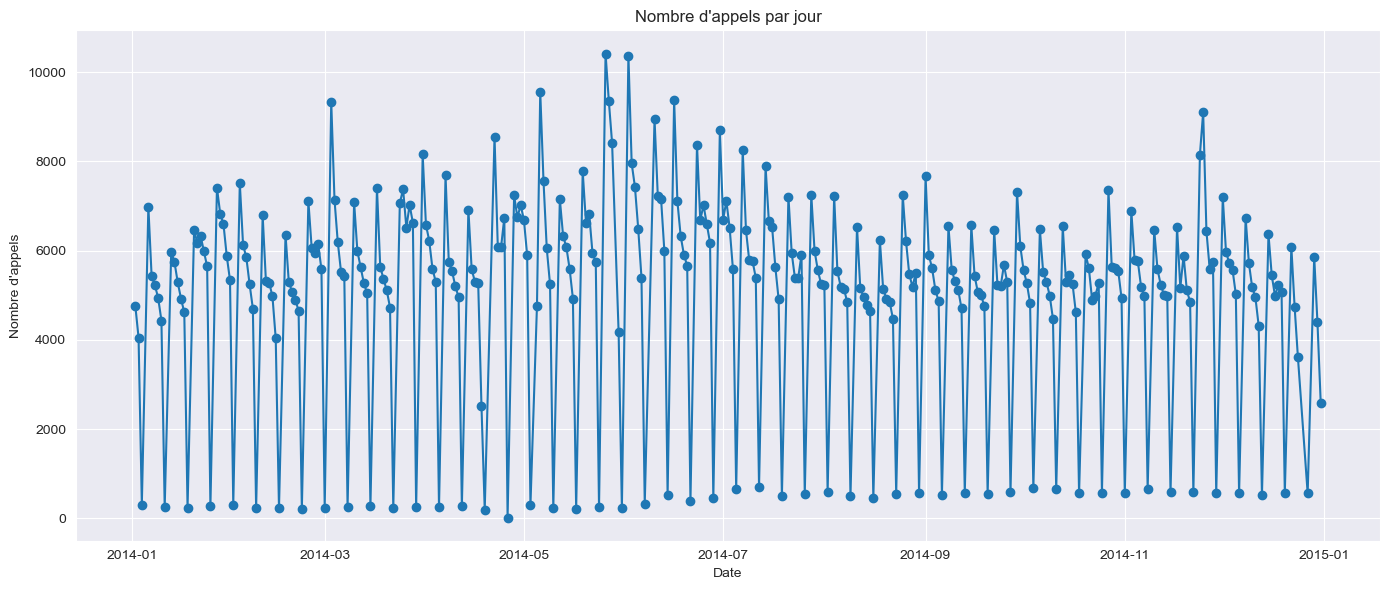

      date_only  nb_calls
122  2014-05-26     10421
127  2014-06-02     10374


In [25]:
# S'assurer que la colonne date est bien datetime


# Extraire la date sans l'heure
df_calls['date_only'] = df_calls['date_received'].dt.date

# Compter les appels par jour
calls_per_day = df_calls.groupby('date_only').size().reset_index(name='nb_calls')

# Trier par nombre d'appels décroissant pour voir les jours avec les pics
top_days = calls_per_day.sort_values(by='nb_calls', ascending=False)

# Afficher les 10 jours avec le plus d'appels
print(top_days.head(10))


# Affichage de la série temporelle
plt.figure(figsize=(14, 6))
plt.plot(calls_per_day['date_only'], calls_per_day['nb_calls'], marker='o')
plt.title("Nombre d'appels par jour")
plt.xlabel("Date")
plt.ylabel("Nombre d'appels")
plt.grid(True)
plt.tight_layout()
plt.show()

threshold = calls_per_day['nb_calls'].mean() + 2 * calls_per_day['nb_calls'].std()
peaks = calls_per_day[calls_per_day['nb_calls'] > threshold]
print(peaks)



In [26]:
calls_by_service = df_calls.groupby('queue_name').size().reset_index(name='nb_calls')

In [27]:
# Top 10 services les plus appelés
top_services = calls_by_service.sort_values(by='nb_calls', ascending=False).head(10)
print("Top 10 services les plus populaires :")
print(top_services)


Top 10 services les plus populaires :
    queue_name  nb_calls
5        30175    603337
20       30560    329299
2        30172    285088
11       30181    157585
9        30179     68905
0        30066     38692
18       30518     31186
13       30241     10639
17       30511      6000
21       30584      2801


In [28]:
# Top 10 services les moins appelés (hors services sans nom si NaN)
bottom_services = calls_by_service.dropna().sort_values(by='nb_calls').head(11)
print("Top 10 services les moins populaires :")
print(bottom_services)


Top 10 services les moins populaires :
    queue_name  nb_calls
1        30170         1
8        30178         6
15       30334        14
22       30598        21
12       30236        24
4        30174        26
23       30694        30
14       30325        47
3        30173        76
7        30177       121
10       30180       210


<Figure size 1200x600 with 0 Axes>

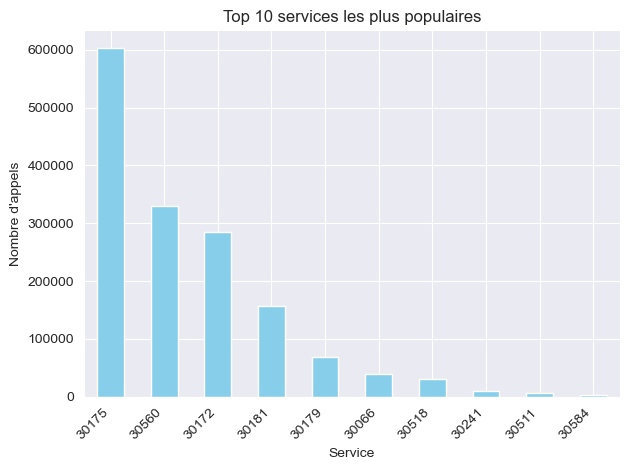

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
top_services.plot(kind='bar', x='queue_name', y='nb_calls', legend=False, color='skyblue')
plt.title("Top 10 services les plus populaires")
plt.ylabel("Nombre d'appels")
plt.xlabel("Service")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [30]:
import pytorch_tabular
print(pytorch_tabular.__version__)


1.1.1
